In [1]:
%matplotlib inline
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [2]:
# Load labeled crypto sentiment data
path_to_data = '../reddit/sentiment_labels_clean.csv'
df = pd.read_csv(path_to_data)

# clip data
df = df[:1000]

# Drop columns that are not used for training
df = df.drop(['id', 'coin'], axis=1)

# Function to convert labels to number.
def sentiment2label(sentiment):
    if sentiment == 'positive':
        return 0
    elif sentiment == 'negative':
        return 1
    else: # neutral
        return 2

df['sentiment'] = df['sentiment'].apply(sentiment2label)

print(df.info())
print(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       1000 non-null   object
 1   sentiment  1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB
None
                                                text  sentiment
0   I have just encountered a Bitcoin scam on a d...          2
1   Maybe theyll rename themselves once theyve am...          2
2  - Part of NFT sale royalties will be swapped f...          2
3  ' The requested withdrawal amount is lower tha...          2
4   this clown still buying machine slave produce...          1
5  "Buy this, buy that" is terrible advice. I see...          1
6  "Crypto Analyst says bitcoin will be $100k/$30...          0
7         "cute animal faces" im looking at you Doge          0
8  "During that BTC run" most altcoins will also ...          2
9  "In the end, it doesnt matter if you hav

In [3]:
# Import training class
from xlnet import XLNetSentimentTrain

In [4]:
# Some tuning advice available at:
# https://mccormickml.com/2019/09/19/XLNet-fine-tuning/
#
# Run training on the labeled crypto data - find the best batch size
# Todo: Batchsize of 128 is also recommended, but don't have enough GPU memory
batches=[48, 32, 16]
history = []
for batchsize in batches:
    xlnet_train = XLNetSentimentTrain(batchsize=batchsize, max_len=64)
    history.append(xlnet_train.train(df, ['text', 'sentiment']))

device cuda:0


Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetForSequenceClassification: ['lm_loss.weight', 'lm_loss.bias']
- This IS expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['sequence_summary.summary.bias', 'logits_proj.weight', 'sequence_summary.summary.weight', 'logits_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions a

train_data_loader 15
val_data_loader 2
test_data_loader 5
Epoch 1/10
----------
train_epoch 0/15
train_epoch 1/15
train_epoch 2/15
train_epoch 3/15
train_epoch 4/15
train_epoch 5/15
train_epoch 6/15
train_epoch 7/15
train_epoch 8/15
train_epoch 9/15
train_epoch 10/15
train_epoch 11/15
train_epoch 12/15
train_epoch 13/15
train_epoch 14/15
Train loss 0.8633066336313884 Train accuracy 0.6722222222222223
eval_model 0/2
eval_model 1/2
Skipping partial batch size (32 < 48)
Val loss 0.8197159767150879 Val accuracy 0.6875

Saving model ./models/xlnet_model.bin
Epoch 2/10
----------
train_epoch 0/15
train_epoch 1/15
train_epoch 2/15
train_epoch 3/15
train_epoch 4/15
train_epoch 5/15
train_epoch 6/15
train_epoch 7/15
train_epoch 8/15
train_epoch 9/15
train_epoch 10/15
train_epoch 11/15
train_epoch 12/15
train_epoch 13/15
train_epoch 14/15
Train loss 0.8265656590461731 Train accuracy 0.6861111111111111
eval_model 0/2
eval_model 1/2
Skipping partial batch size (32 < 48)
Val loss 0.7835492491722107

Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetForSequenceClassification: ['lm_loss.weight', 'lm_loss.bias']
- This IS expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['sequence_summary.summary.bias', 'logits_proj.weight', 'sequence_summary.summary.weight', 'logits_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions a

train_data_loader 23
val_data_loader 3
test_data_loader 7
Epoch 1/10
----------
train_epoch 0/23
train_epoch 1/23
train_epoch 2/23
train_epoch 3/23
train_epoch 4/23
train_epoch 5/23
train_epoch 6/23
train_epoch 7/23
train_epoch 8/23
train_epoch 9/23
train_epoch 10/23
train_epoch 11/23
train_epoch 12/23
train_epoch 13/23
train_epoch 14/23
train_epoch 15/23
train_epoch 16/23
train_epoch 17/23
train_epoch 18/23
train_epoch 19/23
train_epoch 20/23
train_epoch 21/23
train_epoch 22/23
Skipping partial batch size (16 < 32)
Train loss 0.857513200153004 Train accuracy 0.6818181818181818
eval_model 0/3
eval_model 1/3
eval_model 2/3
Skipping partial batch size (16 < 32)
Val loss 0.8082819581031799 Val accuracy 0.6875

Saving model ./models/xlnet_model.bin
Epoch 2/10
----------
train_epoch 0/23
train_epoch 1/23
train_epoch 2/23
train_epoch 3/23
train_epoch 4/23
train_epoch 5/23
train_epoch 6/23
train_epoch 7/23
train_epoch 8/23
train_epoch 9/23
train_epoch 10/23
train_epoch 11/23
train_epoch 12/23

Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetForSequenceClassification: ['lm_loss.weight', 'lm_loss.bias']
- This IS expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['sequence_summary.summary.bias', 'logits_proj.weight', 'sequence_summary.summary.weight', 'logits_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions a

train_data_loader 45
val_data_loader 5
test_data_loader 13
Epoch 1/10
----------
train_epoch 0/45
train_epoch 1/45
train_epoch 2/45
train_epoch 3/45
train_epoch 4/45
train_epoch 5/45
train_epoch 6/45
train_epoch 7/45
train_epoch 8/45
train_epoch 9/45
train_epoch 10/45
train_epoch 11/45
train_epoch 12/45
train_epoch 13/45
train_epoch 14/45
train_epoch 15/45
train_epoch 16/45
train_epoch 17/45
train_epoch 18/45
train_epoch 19/45
train_epoch 20/45
train_epoch 21/45
train_epoch 22/45
train_epoch 23/45
train_epoch 24/45
train_epoch 25/45
train_epoch 26/45
train_epoch 27/45
train_epoch 28/45
train_epoch 29/45
train_epoch 30/45
train_epoch 31/45
train_epoch 32/45
train_epoch 33/45
train_epoch 34/45
train_epoch 35/45
train_epoch 36/45
train_epoch 37/45
train_epoch 38/45
train_epoch 39/45
train_epoch 40/45
train_epoch 41/45
train_epoch 42/45
train_epoch 43/45
train_epoch 44/45
Train loss 0.8443054940965441 Train accuracy 0.6805555555555556
eval_model 0/5
eval_model 1/5
eval_model 2/5
eval_model

train_epoch 0/45
train_epoch 1/45
train_epoch 2/45
train_epoch 3/45
train_epoch 4/45
train_epoch 5/45
train_epoch 6/45
train_epoch 7/45
train_epoch 8/45
train_epoch 9/45
train_epoch 10/45
train_epoch 11/45
train_epoch 12/45
train_epoch 13/45
train_epoch 14/45
train_epoch 15/45
train_epoch 16/45
train_epoch 17/45
train_epoch 18/45
train_epoch 19/45
train_epoch 20/45
train_epoch 21/45
train_epoch 22/45
train_epoch 23/45
train_epoch 24/45
train_epoch 25/45
train_epoch 26/45
train_epoch 27/45
train_epoch 28/45
train_epoch 29/45
train_epoch 30/45
train_epoch 31/45
train_epoch 32/45
train_epoch 33/45
train_epoch 34/45
train_epoch 35/45
train_epoch 36/45
train_epoch 37/45
train_epoch 38/45
train_epoch 39/45
train_epoch 40/45
train_epoch 41/45
train_epoch 42/45
train_epoch 43/45
train_epoch 44/45
Train loss 0.02246866034111008 Train accuracy 0.9930555555555556
eval_model 0/5
eval_model 1/5
eval_model 2/5
eval_model 3/5
eval_model 4/5
Val loss 1.3094479069113731 Val accuracy 0.775

Epoch 10/10


In [5]:
for hist in history:
    print('Epochs: {}'.format(hist['epochs']))
    print('Batchsize: {}'.format(hist['batchsize']))
    print('Max len: {}'.format(hist['max_len']))
    print(hist['classification_report'])
    print()
    
# Batchsize=32 and 48 have the best overall accuracy (0.74) but batchsize=16 has better recall for positive feedback.
# We will use batchsize=16

Epochs: 10
Batchsize: 48
Max len: 64
              precision    recall  f1-score   support

    positive       0.69      0.52      0.60        48
    negative       0.69      0.38      0.49        24
     neutral       0.76      0.90      0.82       120

    accuracy                           0.74       192
   macro avg       0.71      0.60      0.63       192
weighted avg       0.73      0.74      0.72       192


Epochs: 10
Batchsize: 32
Max len: 64
              precision    recall  f1-score   support

    positive       0.67      0.60      0.64        48
    negative       0.59      0.42      0.49        24
     neutral       0.79      0.87      0.83       120

    accuracy                           0.74       192
   macro avg       0.68      0.63      0.65       192
weighted avg       0.73      0.74      0.74       192


Epochs: 10
Batchsize: 16
Max len: 64
              precision    recall  f1-score   support

    positive       0.65      0.67      0.66        48
    negative    

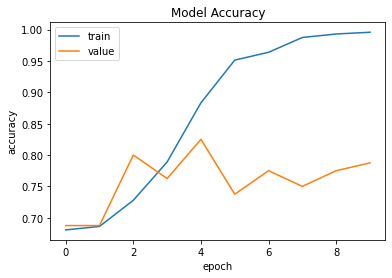

In [8]:
best = history[1]

# Plot of training and value accuracy
plt.plot(best['train_acc'])
plt.plot(best['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'value'], loc='upper left')
plt.show()

# The default choice of 10 epochs was good since accuracy starts approaching at 7 epochs

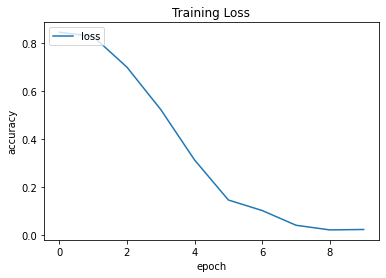

In [10]:
# Plot of training loss
plt.plot(best['train_loss'])
plt.title('Training Loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')
plt.show()

# This training loss curve indicates a low learning rate
# https://towardsdatascience.com/useful-plots-to-diagnose-your-neural-network-521907fa2f45

In [6]:
# Run training on the labeled crypto data - find the best sequence len
sequences=[256, 128, 64]
history = []
for seq in sequences:
    xlnet_train = XLNetSentimentTrain(batchsize=16, max_len=seq)
    history.append(xlnet_train.train(df, ['text', 'sentiment']))

device cuda:0


Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetForSequenceClassification: ['lm_loss.weight', 'lm_loss.bias']
- This IS expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['sequence_summary.summary.bias', 'logits_proj.weight', 'sequence_summary.summary.weight', 'logits_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions a

train_data_loader 45
val_data_loader 5
test_data_loader 13
Epoch 1/10
----------
train_epoch 0/45
train_epoch 1/45
train_epoch 2/45
train_epoch 3/45
train_epoch 4/45
train_epoch 5/45
train_epoch 6/45
train_epoch 7/45
train_epoch 8/45
train_epoch 9/45
train_epoch 10/45
train_epoch 11/45
train_epoch 12/45
train_epoch 13/45
train_epoch 14/45
train_epoch 15/45
train_epoch 16/45
train_epoch 17/45
train_epoch 18/45
train_epoch 19/45
train_epoch 20/45
train_epoch 21/45
train_epoch 22/45
train_epoch 23/45
train_epoch 24/45
train_epoch 25/45
train_epoch 26/45
train_epoch 27/45
train_epoch 28/45
train_epoch 29/45
train_epoch 30/45
train_epoch 31/45
train_epoch 32/45
train_epoch 33/45
train_epoch 34/45
train_epoch 35/45
train_epoch 36/45
train_epoch 37/45
train_epoch 38/45
train_epoch 39/45
train_epoch 40/45
train_epoch 41/45
train_epoch 42/45
train_epoch 43/45
train_epoch 44/45
Train loss 0.8518283923467 Train accuracy 0.6847222222222222
eval_model 0/5
eval_model 1/5
eval_model 2/5
eval_model 3/

train_epoch 1/45
train_epoch 2/45
train_epoch 3/45
train_epoch 4/45
train_epoch 5/45
train_epoch 6/45
train_epoch 7/45
train_epoch 8/45
train_epoch 9/45
train_epoch 10/45
train_epoch 11/45
train_epoch 12/45
train_epoch 13/45
train_epoch 14/45
train_epoch 15/45
train_epoch 16/45
train_epoch 17/45
train_epoch 18/45
train_epoch 19/45
train_epoch 20/45
train_epoch 21/45
train_epoch 22/45
train_epoch 23/45
train_epoch 24/45
train_epoch 25/45
train_epoch 26/45
train_epoch 27/45
train_epoch 28/45
train_epoch 29/45
train_epoch 30/45
train_epoch 31/45
train_epoch 32/45
train_epoch 33/45
train_epoch 34/45
train_epoch 35/45
train_epoch 36/45
train_epoch 37/45
train_epoch 38/45
train_epoch 39/45
train_epoch 40/45
train_epoch 41/45
train_epoch 42/45
train_epoch 43/45
train_epoch 44/45
Train loss 0.828670334815979 Train accuracy 0.6861111111111111
eval_model 0/5
eval_model 1/5
eval_model 2/5
eval_model 3/5
eval_model 4/5
Val loss 0.7868672609329224 Val accuracy 0.6875

Epoch 10/10
----------
train_e

/home/rrmorris/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rrmorris/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rrmorris/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


device cuda:0


Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetForSequenceClassification: ['lm_loss.weight', 'lm_loss.bias']
- This IS expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['sequence_summary.summary.bias', 'logits_proj.weight', 'sequence_summary.summary.weight', 'logits_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions a

train_data_loader 45
val_data_loader 5
test_data_loader 13
Epoch 1/10
----------
train_epoch 0/45
train_epoch 1/45
train_epoch 2/45
train_epoch 3/45
train_epoch 4/45
train_epoch 5/45
train_epoch 6/45
train_epoch 7/45
train_epoch 8/45
train_epoch 9/45
train_epoch 10/45
train_epoch 11/45
train_epoch 12/45
train_epoch 13/45
train_epoch 14/45
train_epoch 15/45
train_epoch 16/45
train_epoch 17/45
train_epoch 18/45
train_epoch 19/45
train_epoch 20/45
train_epoch 21/45
train_epoch 22/45
train_epoch 23/45
train_epoch 24/45
train_epoch 25/45
train_epoch 26/45
train_epoch 27/45
train_epoch 28/45
train_epoch 29/45
train_epoch 30/45
train_epoch 31/45
train_epoch 32/45
train_epoch 33/45
train_epoch 34/45
train_epoch 35/45
train_epoch 36/45
train_epoch 37/45
train_epoch 38/45
train_epoch 39/45
train_epoch 40/45
train_epoch 41/45
train_epoch 42/45
train_epoch 43/45
train_epoch 44/45
Train loss 0.8481415417459276 Train accuracy 0.6833333333333333
eval_model 0/5
eval_model 1/5
eval_model 2/5
eval_model

eval_model 3/5
eval_model 4/5
Val loss 0.791548091173172 Val accuracy 0.8

Epoch 9/10
----------
train_epoch 0/45
train_epoch 1/45
train_epoch 2/45
train_epoch 3/45
train_epoch 4/45
train_epoch 5/45
train_epoch 6/45
train_epoch 7/45
train_epoch 8/45
train_epoch 9/45
train_epoch 10/45
train_epoch 11/45
train_epoch 12/45
train_epoch 13/45
train_epoch 14/45
train_epoch 15/45
train_epoch 16/45
train_epoch 17/45
train_epoch 18/45
train_epoch 19/45
train_epoch 20/45
train_epoch 21/45
train_epoch 22/45
train_epoch 23/45
train_epoch 24/45
train_epoch 25/45
train_epoch 26/45
train_epoch 27/45
train_epoch 28/45
train_epoch 29/45
train_epoch 30/45
train_epoch 31/45
train_epoch 32/45
train_epoch 33/45
train_epoch 34/45
train_epoch 35/45
train_epoch 36/45
train_epoch 37/45
train_epoch 38/45
train_epoch 39/45
train_epoch 40/45
train_epoch 41/45
train_epoch 42/45
train_epoch 43/45
train_epoch 44/45
Train loss 0.042220853786501616 Train accuracy 0.9875
eval_model 0/5
eval_model 1/5
eval_model 2/5
eval

Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetForSequenceClassification: ['lm_loss.weight', 'lm_loss.bias']
- This IS expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['sequence_summary.summary.bias', 'logits_proj.weight', 'sequence_summary.summary.weight', 'logits_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions a

train_data_loader 45
val_data_loader 5
test_data_loader 13
Epoch 1/10
----------
train_epoch 0/45
train_epoch 1/45
train_epoch 2/45
train_epoch 3/45
train_epoch 4/45
train_epoch 5/45
train_epoch 6/45
train_epoch 7/45
train_epoch 8/45
train_epoch 9/45
train_epoch 10/45
train_epoch 11/45
train_epoch 12/45
train_epoch 13/45
train_epoch 14/45
train_epoch 15/45
train_epoch 16/45
train_epoch 17/45
train_epoch 18/45
train_epoch 19/45
train_epoch 20/45
train_epoch 21/45
train_epoch 22/45
train_epoch 23/45
train_epoch 24/45
train_epoch 25/45
train_epoch 26/45
train_epoch 27/45
train_epoch 28/45
train_epoch 29/45
train_epoch 30/45
train_epoch 31/45
train_epoch 32/45
train_epoch 33/45
train_epoch 34/45
train_epoch 35/45
train_epoch 36/45
train_epoch 37/45
train_epoch 38/45
train_epoch 39/45
train_epoch 40/45
train_epoch 41/45
train_epoch 42/45
train_epoch 43/45
train_epoch 44/45
Train loss 0.8443054940965441 Train accuracy 0.6805555555555556
eval_model 0/5
eval_model 1/5
eval_model 2/5
eval_model

train_epoch 0/45
train_epoch 1/45
train_epoch 2/45
train_epoch 3/45
train_epoch 4/45
train_epoch 5/45
train_epoch 6/45
train_epoch 7/45
train_epoch 8/45
train_epoch 9/45
train_epoch 10/45
train_epoch 11/45
train_epoch 12/45
train_epoch 13/45
train_epoch 14/45
train_epoch 15/45
train_epoch 16/45
train_epoch 17/45
train_epoch 18/45
train_epoch 19/45
train_epoch 20/45
train_epoch 21/45
train_epoch 22/45
train_epoch 23/45
train_epoch 24/45
train_epoch 25/45
train_epoch 26/45
train_epoch 27/45
train_epoch 28/45
train_epoch 29/45
train_epoch 30/45
train_epoch 31/45
train_epoch 32/45
train_epoch 33/45
train_epoch 34/45
train_epoch 35/45
train_epoch 36/45
train_epoch 37/45
train_epoch 38/45
train_epoch 39/45
train_epoch 40/45
train_epoch 41/45
train_epoch 42/45
train_epoch 43/45
train_epoch 44/45
Train loss 0.02246866034111008 Train accuracy 0.9930555555555556
eval_model 0/5
eval_model 1/5
eval_model 2/5
eval_model 3/5
eval_model 4/5
Val loss 1.3094479069113731 Val accuracy 0.775

Epoch 10/10


In [7]:
for hist in history:
    print('Epochs: {}'.format(hist['epochs']))
    print('Batchsize: {}'.format(hist['batchsize']))
    print('Max len: {}'.format(hist['max_len']))
    print(hist['classification_report'])
    print()
    
# Max_len of 64 gives the best total accuracy and recall

Epochs: 10
Batchsize: 16
Max len: 256
              precision    recall  f1-score   support

    positive       0.00      0.00      0.00        48
    negative       0.00      0.00      0.00        24
     neutral       0.62      1.00      0.77       120

    accuracy                           0.62       192
   macro avg       0.21      0.33      0.26       192
weighted avg       0.39      0.62      0.48       192


Epochs: 10
Batchsize: 16
Max len: 128
              precision    recall  f1-score   support

    positive       0.76      0.52      0.62        48
    negative       0.50      0.42      0.45        24
     neutral       0.76      0.88      0.82       120

    accuracy                           0.73       192
   macro avg       0.67      0.61      0.63       192
weighted avg       0.73      0.73      0.72       192


Epochs: 10
Batchsize: 16
Max len: 64
              precision    recall  f1-score   support

    positive       0.65      0.67      0.66        48
    negative  

In [ ]:
# The following parameters for XLNet training are giving the best results:
# Epochs - 10
# Batchsize - 16
# Max_len - 64